In [1]:
#import pyarrow.feather as feather
import pandas as pd
import numpy as np
#from scipy.io import netcdf
import matplotlib.pyplot as plt 
import datetime
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [2]:
# it is better for visualisation if the columns date type (not int or str)
# when save df to csv, if the column names are date, they are saved as str
def convert_col_to_date(columns):
    
    # convert the columns type
    #columns = df.columns
    new_columns = []
    for col in columns:
        try:
            new_columns.append(pd.to_datetime(col).date())
        except: new_columns.append(col)
    return new_columns

# 1.  keep the bgr that have t.s, temp, and prec to build models

In [3]:
# import freq df
freq_level =  pd.read_csv("dataset/modeling/freq_level.csv").set_index("proj_id")
print(freq_level.shape)
print(" ")
print("details: ")
print(f"daily_freq: {freq_level[freq_level['daily']].shape}")
print(f"mid_weekly_freq: {freq_level[freq_level['mid_weekly']].shape}")
print(f"weekly_freq: {freq_level[freq_level['weekly']].shape}")
print(f"fortnight_freq: {freq_level[freq_level['fortnight']].shape}")
print(f"low_freq_freq: {freq_level[freq_level['low_freq']].shape}")

freq_level.head()

(12326, 7)
 
details: 
daily_freq: (3028, 7)
mid_weekly_freq: (957, 7)
weekly_freq: (5713, 7)
fortnight_freq: (1658, 7)
low_freq_freq: (970, 7)


,daily,mid_weekly,weekly,fortnight,low_freq,freq,length
proj_id,,,,,,,
BB_25470023,False,False,True,False,False,7.0,567
BB_25470024,False,False,True,False,False,7.0,566
BB_25480025,False,False,True,False,False,7.0,567
BB_25480026,False,False,True,False,False,7.0,569
BB_25481088,True,False,False,False,False,1.0,5019


In [3]:
# import t s and convert into date type
grouped_t_s = pd.read_csv("dataset/modeling/grouped_t_s.csv")
grouped_t_s = grouped_t_s.set_index("proj_id")
print(grouped_t_s.shape)
grouped_t_s.columns = convert_col_to_date(grouped_t_s.columns)
grouped_t_s.head()

(12326, 6577)


,1995-01-01,1995-01-02,1995-01-03,1995-01-04,1995-01-05,1995-01-06,1995-01-07,1995-01-08,1995-01-09,1995-01-10,...,2012-12-24,2012-12-25,2012-12-26,2012-12-27,2012-12-28,2012-12-29,2012-12-30,2012-12-31,freq,length
proj_id,,,,,,,,,,,,,,,,,,,,,
BB_25470023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,567
BB_25470024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,566
BB_25480025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,567
BB_25480026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,569
BB_25481088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,37.33,37.35,37.33,37.35,37.3,37.31,37.34,37.34,1.0,5019


### the ts df has the same length as freq
#### 

In [4]:
# import daily_temp (ave computed in place)
ave_temp = pd.read_csv("dataset/modeling/ave_temp.csv").set_index("proj_id")
columns = convert_col_to_date(ave_temp.columns[:-1])
columns.append("freq")
ave_temp.columns= columns
print(ave_temp.shape)
ave_temp.head()


(12326, 6545)


,1995-01-01,1995-01-02,1995-01-03,1995-01-04,1995-01-05,1995-01-06,1995-01-07,1995-01-08,1995-01-09,1995-01-10,...,2012-11-22,2012-11-23,2012-11-24,2012-11-25,2012-11-26,2012-11-27,2012-11-28,2012-11-29,2012-11-30,freq
proj_id,,,,,,,,,,,,,,,,,,,,,
BB_25470023,14.0,-8.0,-26.0,-63.0,-65.0,-80.0,-43.4286,-53.4286,-55.0000,-49.0000,...,33.7143,39.2857,43.4286,47.2857,51.5714,54.0000,54.4286,51.5714,48.7143,7.0
BB_25470024,14.0,-8.0,-26.0,-63.0,-65.0,-80.0,-43.4286,-53.4286,-55.0000,-49.0000,...,33.7143,39.2857,43.4286,47.2857,51.5714,54.0000,54.4286,51.5714,48.7143,7.0
BB_25480025,17.0,-6.0,-27.0,-67.0,-63.0,-80.0,-42.8571,-52.7143,-54.5714,-48.1429,...,32.4286,37.8571,42.4286,46.1429,50.1429,52.7143,53.2857,51.0000,49.0000,7.0
BB_25480026,14.0,-8.0,-28.0,-65.0,-65.0,-81.0,-44.2857,-54.2857,-56.0000,-49.7143,...,33.8571,39.4286,43.5714,47.4286,51.8571,54.2857,54.7143,51.7143,48.7143,7.0
BB_25481088,17.0,-6.0,-26.0,-66.0,-62.0,-80.0,-74.0000,-52.0000,-19.0000,18.0000,...,59.0000,33.0000,49.0000,60.0000,62.0000,64.0000,48.0000,42.0000,19.0000,1.0


### there are 12382 rows in ave_temp, and 12590 in freq -> keep the intersection

In [ ]:
# keep the inntersection between freq_level and the ave_temp
temp_freq_df = pd.concat([freq_level, ave_temp], axis=1, join='inner', ignore_index=False, keys=None,
          levels=None, names=None, verify_integrity=False, copy=True)
print(temp_freq_df.shape)
temp_freq_df.head()

In [ ]:
# split the freq df again
freq_level = temp_freq_df.drop(temp_freq_df.columns[5:], axis =1)
print("freq_level: ",freq_level.shape)
freq_level.head()

In [5]:
# import the cum_prec 
cum_prec=pd.read_csv("dataset/modeling/cum_prec.csv").set_index("proj_id")
columns = convert_col_to_date(cum_prec.columns[:-1])
columns.append("freq")
cum_prec.columns=columns
print(cum_prec.shape)
cum_prec.head()

(12326, 6545)


,1995-01-01,1995-01-02,1995-01-03,1995-01-04,1995-01-05,1995-01-06,1995-01-07,1995-01-08,1995-01-09,1995-01-10,...,2012-11-22,2012-11-23,2012-11-24,2012-11-25,2012-11-26,2012-11-27,2012-11-28,2012-11-29,2012-11-30,freq
proj_id,,,,,,,,,,,,,,,,,,,,,
BB_25470023,3.0,25.0,0.0,0.0,0.0,0.0,28.0,39.0,78.0,96.0,...,18.0,24.0,32.0,20.0,41.0,41.0,58.0,165.0,165.0,7.0
BB_25470024,3.0,25.0,0.0,0.0,0.0,0.0,28.0,39.0,78.0,96.0,...,18.0,24.0,32.0,20.0,41.0,41.0,58.0,165.0,165.0,7.0
BB_25480025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,17.0,20.0,26.0,15.0,37.0,37.0,42.0,158.0,157.0,7.0
BB_25480026,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,17.0,22.0,29.0,18.0,40.0,40.0,62.0,177.0,178.0,7.0
BB_25481088,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,3.0,6.0,4.0,22.0,0.0,12.0,122.0,3.0,1.0


### again 12326 rows in cum_prec and 12382 rows in the last freq df -> keep the intersection

In [ ]:
#  keep the inntersection between freq_level and the cum_prec
prec_freq_df = pd.concat([freq_level, cum_prec], axis=1, join='inner', ignore_index=False, keys=None,
          levels=None, names=None, verify_integrity=False, copy=True)
print(prec_freq_df.shape)
prec_freq_df.head()

In [ ]:
# split the freq df again
freq_level = prec_freq_df.drop(prec_freq_df.columns[5:-1], axis =1)
print("freq_level: ",freq_level.shape)
freq_level.head()

### these 12326 t s will be used in modeling, which all have groundwater ts, and coresponding temp, and prec  

In [ ]:
# save the last freq df, 
# then this filter will be apply again on the 3 t s to be sure that all of them have the same dims
# and save the resulted dfs of ts, temp, prec
freq_level.to_csv("dataset/modeling/freq_level.csv")

In [ ]:
#  # apply the filter (last freq_level) on the grouped_t_s
grouped_t_s_freq_df = pd.concat([freq_level, grouped_t_s], axis=1, join='inner', ignore_index=False, keys=None,
          levels=None, names=None, verify_integrity=False, copy=True)
print(f"grouped_t_s_freq_df: {grouped_t_s_freq_df.shape}")
grouped_t_s = grouped_t_s_freq_df.drop(grouped_t_s_freq_df.columns[:5], axis =1)
grouped_t_s.head()
#grouped_t_s.to_csv("dataset/modeling/grouped_t_s.csv")

In [ ]:
# apply the filter (last freq_level) on ave temp
freq_level = freq_level.drop(freq_level.columns[-1], axis=1)
temp_freq_df = pd.concat([freq_level, ave_temp], axis=1, join='inner', ignore_index=False, keys=None,
          levels=None, names=None, verify_integrity=False, copy=True)
print(f"temp_freq_df:{temp_freq_df.shape}")
ave_temp = temp_freq_df.drop(temp_freq_df.columns[:5], axis =1)
# ave_temp.head()
# ave_temp.to_csv("dataset/modeling/ave_temp.csv")

In [ ]:
# apply the filter (last freq_level) on cum_prec
freq_level = freq_level.drop(freq_level.columns[-1], axis=1)
prec_freq_df = pd.concat([freq_level, cum_prec], axis=1, join='inner', ignore_index=False, keys=None,
          levels=None, names=None, verify_integrity=False, copy=True)
print(f"temp_freq_df:{prec_freq_df.shape}")
cum_prec = prec_freq_df.drop(temp_freq_df.columns[:5], axis =1)
#cum_prec.head()
#cum_prec.to_csv("dataset/modeling/cum_prec.csv")

### 12326 t s with corresponding ave_temp, cum_prec to use in modeling

## 
# 2. basic analysis

In [4]:
# import t s and convert into date type
grouped_t_s = pd.read_csv("dataset/modeling/grouped_t_s.csv")
grouped_t_s = grouped_t_s.set_index("proj_id")
print(grouped_t_s.shape)
columns = convert_col_to_date(grouped_t_s.columns)
grouped_t_s.head()

(12326, 6577)


,1995-01-01,1995-01-02,1995-01-03,1995-01-04,1995-01-05,1995-01-06,1995-01-07,1995-01-08,1995-01-09,1995-01-10,...,2012-12-24,2012-12-25,2012-12-26,2012-12-27,2012-12-28,2012-12-29,2012-12-30,2012-12-31,freq,length
proj_id,,,,,,,,,,,,,,,,,,,,,
BB_25470023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,567
BB_25470024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,566
BB_25480025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,567
BB_25480026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,569
BB_25481088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,37.33,37.35,37.33,37.35,37.3,37.31,37.34,37.34,1.0,5019


### compute the length of each t s

In [ ]:
# compute the length of each t s and save the res in freq_level and in the grouped_t_s
#grouped_t_s["length"] = grouped_t_s.apply(lambda row:len(row[:-2].dropna()), axis =1)
#df = pd.concat([freq_level[freq_level.columns[:-1]], grouped_t_s], axis=1, join='inner', ignore_index=False, keys=None,
#          levels=None, names=None, verify_integrity=False, copy=True)
#freq_level = df.drop(df.columns[5:-2],axis=1)
#freq_level.to_csv("dataset/modeling/freq_level.csv")

In [63]:
# compute the regular length of a  t s
#(pd.to_datetime("2012-12-31") - pd.to_datetime("1995-01-01")).days/7

939.1428571428571

Text(0.5, 1.0, 'length dist of freq 30 t s, regular= 219.13 months')

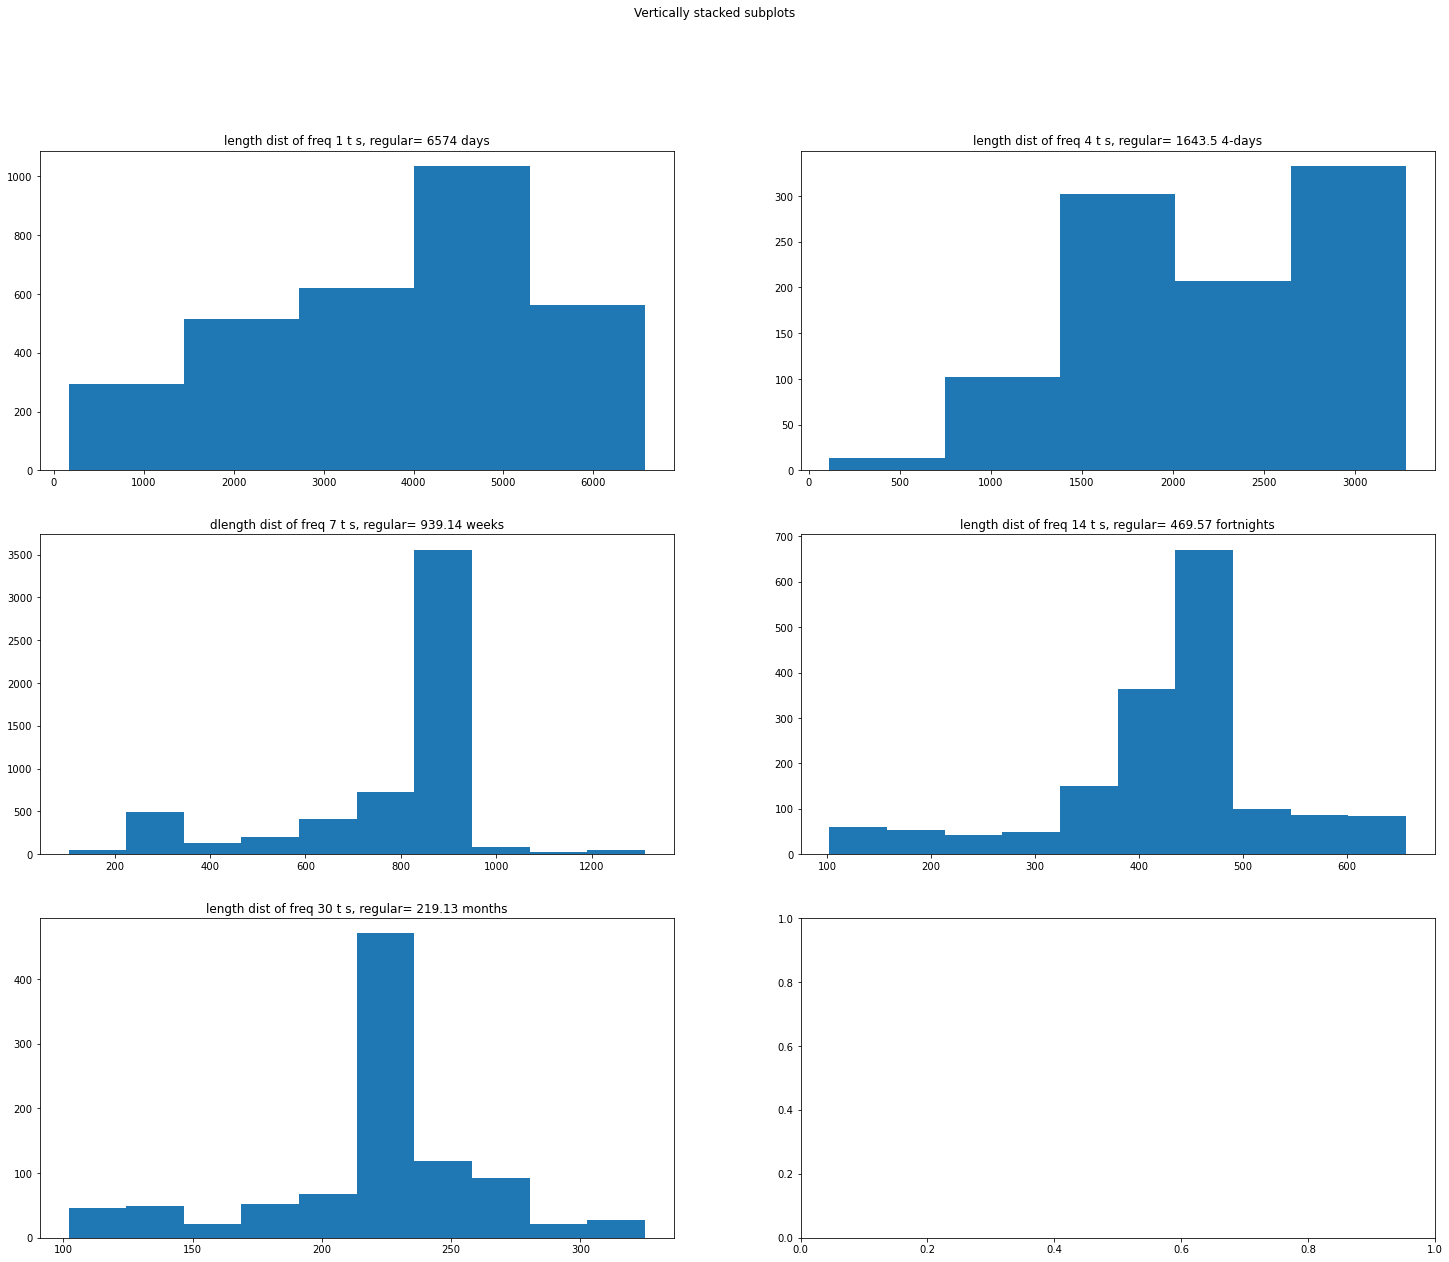

In [99]:

fig, axs = plt.subplots(3,2, figsize=(25,20))
fig.suptitle('Vertically stacked subplots')

axs[0,0].hist(freq_level[freq_level["freq"]==1]["length"], bins=5)
axs[0,0].set_title('length dist of freq 1 t s, regular= 6574 days')

axs[0,1].hist(freq_level[freq_level["freq"]==4]["length"], bins=5)
axs[0,1].set_title('length dist of freq 4 t s, regular= 1643.5 4-days')

axs[1,0].hist(freq_level[freq_level["freq"]==7]["length"], bins=10)
axs[1,0].set_title('dlength dist of freq 7 t s, regular= 939.14 weeks')

axs[1,1].hist(freq_level[freq_level["freq"]==14]["length"], bins=10)
axs[1,1].set_title('length dist of freq 14 t s, regular= 469.57 fortnights')

axs[2,0].hist(freq_level[freq_level["freq"]==30]["length"], bins=10)
axs[2,0].set_title('length dist of freq 30 t s, regular= 219.13 months')


### from the previous analysis, the weekly, fortnight, and monthly t s are not affected very much by the freq division used before (the majority are regular), there is a bit problem in the daily and mid-weekly.

### we will pick randomly 5  t s (one from each level of the max in the hist) from each level of freq (daily, mid_weekly,  weekly,  fortnight, monthly)    -> we build 25 basic models which we can easily generalize to any other t s with the same setting (freq and length)

In [102]:
# compute the ranges (bins) of lengths at each freq level
# i.e hist of the length at each freq level
f1 =freq_level[freq_level["freq"]==1]
f1len =freq_level[freq_level["freq"]==1]["length"]
counts1, bins1 = np.histogram(f1len, bins=5)

f4 =freq_level[freq_level["freq"]==4]
f4len =freq_level[freq_level["freq"]==4]["length"]
counts4, bins4 = np.histogram(f4len, bins=5)

f7 =freq_level[freq_level["freq"]==7]
f7len =freq_level[freq_level["freq"]==7]["length"]
counts7, bins7 = np.histogram(f7len)

f14 =freq_level[freq_level["freq"]==14]
f14len =freq_level[freq_level["freq"]==14]["length"]
counts14, bins14 = np.histogram(f14len)

f30 =freq_level[freq_level["freq"]==30]
f30len =freq_level[freq_level["freq"]==30]["length"]
counts30, bins30 = np.histogram(f30len)


In [121]:
# add a flag columns to each freq df
def length_class(df, bins, counts):
    
    d =pd.DataFrame([bins, bins[1:], counts]).T.sort_values(by=2, ascending=False, ignore_index=True)
    d.columns=["len1","len2","num_of_t_s"]

    x =df["length"]
    if d["len1"][0] <= x < d["len2"][0]:
        return 1
    if d["len1"][1] <= x < d["len2"][1]:
        return 2
    if d["len1"][2] <= x < d["len2"][2]:
        return 3
    if d["len1"][3] <= x <=d["len2"][3]:
        return 4
    if d["len1"][4] <= x <=d["len2"][4]:
        return 5

    
f1["len_class"]=f1.apply(length_class, args=(bins1,counts1),axis=1)
f4["len_class"]=f4.apply(length_class, args=(bins4,counts4),axis=1)
f7["len_class"]=f7.apply(length_class, args=(bins7,counts7),axis=1)
f14["len_class"]=f14.apply(length_class, args=(bins14,counts14),axis=1)
f30["len_class"]=f30.apply(length_class, args=(bins30,counts30),axis=1)

In [127]:
import random
# pick the sample t s
sample_t_s =[]
for len_level in sorted(f1["len_class"].unique())[:5]:
    sample_t_s.append(random.choice(f1[f1["len_class"]==len_level].index))
    sample_t_s.append(random.choice(f4[f4["len_class"]==len_level].index))
    sample_t_s.append(random.choice(f7[f7["len_class"]==len_level].index))
    sample_t_s.append(random.choice(f14[f14["len_class"]==len_level].index))
    sample_t_s.append(random.choice(f30[f30["len_class"]==len_level].index))

In [173]:
# the picked sample : t s for the basic models
freq_sample = freq_level.loc[sample_t_s].sort_values(by=["freq","length"])
print(freq_sample.shape)
freq_sample

(25, 7)


,daily,mid_weekly,weekly,fortnight,low_freq,freq,length
proj_id,,,,,,,
BE_15166,True,False,False,False,False,1.0,615
TH_5229210601,True,False,False,False,False,1.0,2192
BE_5600,True,False,False,False,False,1.0,2829
BY_24158,True,False,False,False,False,1.0,4267
BE_209,True,False,False,False,False,1.0,5906
BY_6166,False,True,False,False,False,4.0,114
HE_12213,False,True,False,False,False,4.0,1376
NW_80303559,False,True,False,False,False,4.0,1489
NI_100000565,False,True,False,False,False,4.0,2607


<BarContainer object of 25 artists>

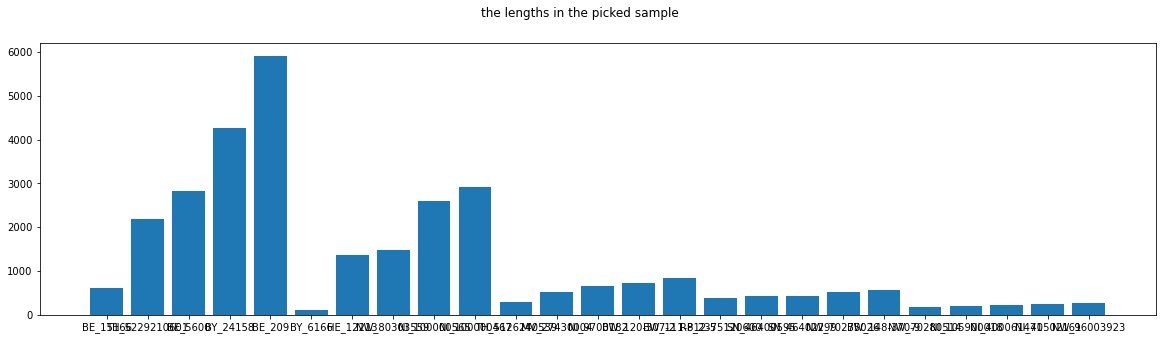

In [171]:
# look at the lengths in the picked sample
fig, axs = plt.subplots(1,1, figsize=(20,5))
fig.suptitle('the lengths in the picked sample')

axs.bar(freq_sample.index,freq_sample["length"])
#axs.set_title('length dist of freq 1 t s, regular= 6574 days')

#axs[1].bar(freq_sample1.index,freq_sample1["length"])
#axs[1].set_title('length dist of freq 4 t s, regular= 1643.5 4-days')


In [174]:
#freq_sample.to_csv("dataset/modeling/sample/freq_sample.csv")

# 
## Sampling 

In [6]:
freq_level = pd.read_csv("dataset/modeling/sample/freq_sample.csv").set_index("proj_id")
freq_level.head()

,daily,mid_weekly,weekly,fortnight,low_freq,freq,length
proj_id,,,,,,,
BE_15166,True,False,False,False,False,1.0,615
TH_5229210601,True,False,False,False,False,1.0,2192
BE_5600,True,False,False,False,False,1.0,2829
BY_24158,True,False,False,False,False,1.0,4267
BE_209,True,False,False,False,False,1.0,5906


In [ ]:
sample_t_s = freq_level.index
# capture the sample from the original df
sample_t_s_df =grouped_t_s.loc[sample_t_s].sort_values(by=["freq","length"])
sample_temp_df =ave_temp.loc[sample_t_s].sort_values(by=["freq"])
sample_prec_df =cum_prec.loc[sample_t_s].sort_values(by=["freq"])

# save the sample
#sample_t_s_df.to_csv("dataset/modeling/sample/sample_t_s.csv")
#sample_temp_df.to_csv("dataset/modeling/sample/sample_temp.csv")
#sample_prec_df.to_csv("dataset/modeling/sample/sample_prec.csv")

## ploting 

In [ ]:
#bgr_serial = 1246 #freq 1
#bgr_serial =  #freq 
bgr_serial = 2146 #freq 7
#bgr_serial = 2461 #freq 7
#bgr_serial = 4689 #freq 14
#bgr_serial = 8888 #freq 30
f =ave_temp.iloc[bgr_serial][-1] 
ts_index = grouped_t_s.iloc[bgr_serial].dropna().index
ts_index = ts_index[ts_index < ave_temp.iloc[bgr_serial].index[-2]]

In [ ]:
fig.suptitle('Vertically stacked subplots')

fig, axs = plt.subplots(3,1, figsize=(20,10))
axs[0].plot(grouped_t_s.iloc[bgr_serial].dropna()[-100:])
axs[0].set_title('ground-wanter t s')
axs[1].plot(ave_temp.iloc[bgr_serial].dropna()[ts_index][-100:])
axs[1].set_title('ave_temp')
axs[2].plot(daily_temp.iloc[bgr_serial].dropna()[ts_index][-100:])
axs[2].set_title('daily_temp')

In [ ]:
plt.figure(figsize=(20,10))

ave_temp.iloc[bgr_serial].dropna()[ts_index][:100].plot(color='blue',grid=True)
#ave_temp.loc["BB_25481088"].dropna()[5000:5200].plot(color='red',grid=True, secondary_y=True)
plt.title(f"daily_temp (red) vs ave_temp (blue) at a bgr station, freq={f}")

In [ ]:
# split the ave_temp
ave_temp = temp_freq_df.drop(temp_freq_df.columns[:5], axis =1)
print("ave_temp: ",freq_level.shape)
ave_temp.to_csv("dataset/modeling/ave_temp.csv")